In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity


csv_path = '/Users/carina/Desktop/Hometrics/data_analysis/dataset/raw/NYPD_Arrest_Data__Year_to_Date_.csv'
arrest_data = pd.read_csv(csv_path)

latitude = arrest_data['Latitude']
longitude = arrest_data['Longitude']

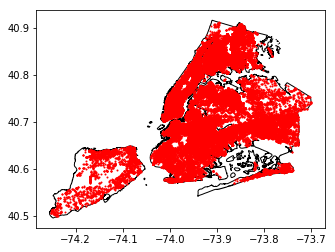

In [6]:
# Plot criminal events on map

import geopandas as gpd
geo_path = '/Users/carina/Desktop/Hometrics/data_analysis/dataset/raw/Borough Boundaries/geo_export_57a212de-dc19-4b69-ae16-e09f84614449.shp'
shape = gpd.read_file(geo_path).to_crs({'init': 'epsg:4326'})
shape.plot(color='white', edgecolor='black')
plt.scatter(longitude, latitude, s=1, c='r')

In [7]:
# training data
lat_arr = np.reshape(latitude.values,(len(latitude.values),1))
lon_arr = np.reshape(longitude.values,(len(longitude.values),1))
lat_lon = np.hstack((lat_arr,lon_arr))

In [8]:
# Density estimation model
kde = KernelDensity(bandwidth=0.04, metric='haversine',
                    kernel='gaussian', algorithm='ball_tree')
kde.fit(lat_lon)

KernelDensity(algorithm='ball_tree', atol=0, bandwidth=0.04,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='haversine', metric_params=None, rtol=0)

In [9]:
# Construct grids
x = np.linspace(latitude.min(),latitude.max(),num = 500,endpoint = True)
y = np.linspace(longitude.min(),longitude.max(),num = 500,endpoint = True)
lat,lon = np.meshgrid(x, y)
lat_lon_arr = np.vstack([lat.ravel(),lon.ravel()]).T

In [10]:
# Run model
z = np.exp(kde.score_samples(lat_lon_arr))
z

array([0.28106066, 0.28375607, 0.28637281, ..., 0.00514382, 0.00502272,
       0.00490346])

<Figure size 432x288 with 0 Axes>

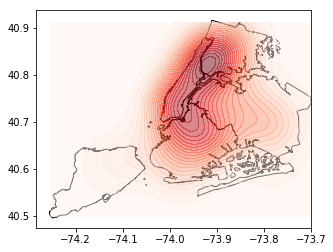

In [12]:
# plot
levels = np.linspace(0, z.max(), 25)
fig = plt.figure()
shape.plot(color='white', edgecolor='black')
plt.contourf(lon, lat, z.reshape(500, 500), levels=levels, cmap=plt.cm.Reds, alpha=0.5)